# Antes de empezar:

    Lee el archivo README.md
    Comenta todo lo que puedas y utiliza los recursos (archivo README.md)
    ¡Feliz aprendizaje!

En este ejercicio, generaremos números aleatorios a partir de las disribuciones continuas que aprendimos en la lección. Hay dos formas de generar números aleatorios:

1. Usando la librería numpy 
1. Usando la librería Scipy 

Utiliza cualquiera de las dos librerías o ambas en este ejercicio.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Distribución Uniforme

Para generar números aleatorios uniformes entre dos valores dados usando scipy, podemos usar el siguiente código o el código que hemos
discutido en clase:

In [ ]:
import scipy.stats as stats


min_val = 10
max_val = 20

# Genera un número aleatorio uniforme entre min_val y max_val
random_number = stats.uniform.rvs(loc=min_val, scale=max_val - min_val)

print("Número aleatorio uniforme:", random_number)


**Tarea:**

1. Basándote en el código anterior, escribe una función que genere números aleatorios uniformemente distribuidos. Hay varios requisitos para tu función:
    * Debe aceptar 3 parámetros: 
        * `bottom` - el límite inferior de los números generados
        * `ceiling` - el límite superior de los números generados
        * `count` - cuántos números generar
    * Debe devolver una matriz de números aleatorios distribuidos uniformemente

2. Llama a tu función con 2 conjuntos de parámetros a continuación:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

3. Traza las distribuciones uniformes generadas anteriormente utilizando histogramas, donde el eje x es el valor y el eje y es el recuento. Que el número de intervalos del histograma sea 10.

El resultado debe ser como el siguiente:

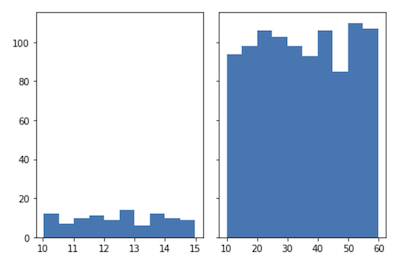

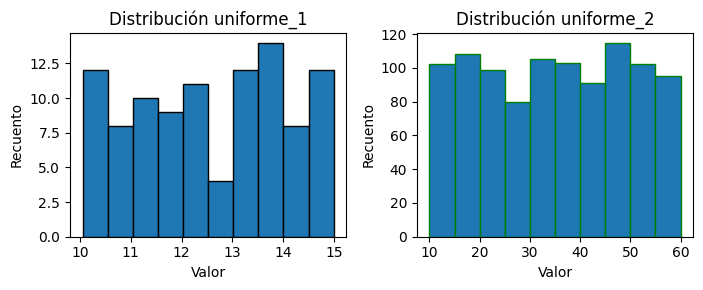

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def generar_numeros_uniformes(bottom, ceiling, count):
    return stats.uniform.rvs(loc=bottom, scale=ceiling - bottom, size=count)


numeros_1 = generar_numeros_uniformes(10, 15, 100)
numeros_2 = generar_numeros_uniformes(10, 60, 1000)


fig, axes = plt.subplots(1, 2, figsize=(7, 3))

#para numeros_1
axes[0].hist(numeros_1, bins=10, edgecolor='black')
axes[0].set_title('Distribución uniforme_1')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Recuento')

#para numeros_2
axes[1].hist(numeros_2, bins=10, edgecolor='black')
axes[1].set_title('Distribución uniforme_2')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Recuento')

#histogramas
plt.tight_layout()
plt.show()



In [4]:
El 1 tiene picos mas pronunciados,en el segundo al tener más numeros en el rango es todo más uniforme

In [ ]:
# your code here

How are the two distributions different?

In [6]:
El primero tiene picos mas pronunciados,en el segundo al tener más numeros en el rango es todo más uniforme

## Distribución Normal

1. De la misma manera en el reto de Distribución Uniforme, escriba una función que genere números aleatorios distribuidos normalmente.
1. Genera 1.000 números distribuidos normalmente con media de 10 y desviación típica de 1
1. Genera 1.000 números distribuidos normalmente con una media de 10 y una desviación típica de 50
2. Representa gráficamente las distribuciones de los datos generados.

Resultado esperado:

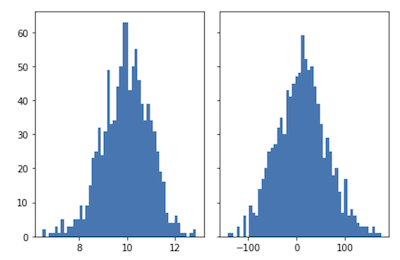

In [8]:
from scipy.stats import norm

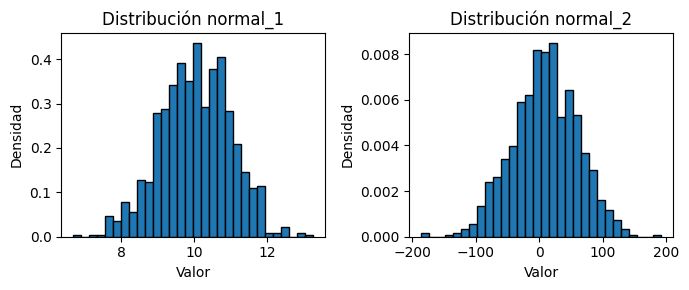

In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def generar_numeros_normales(media, desviacion, count):
    
     return stats.norm.rvs(loc=media, scale=desviacion, size=count)


numeros_1 = generar_numeros_normales(10, 1, 1000)
numeros_2 = generar_numeros_normales(10, 50, 1000)


fig, axes = plt.subplots(1, 2, figsize=(7, 3))

#numeros_1
axes[0].hist(numeros_1, bins=30, edgecolor='black', density=True)
axes[0].set_title('Distribución normal_1')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Densidad')


#numeros_2
axes[1].hist(numeros_2, bins=30, edgecolor='black', density=True)
axes[1].set_title('Distribución normal_2')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Densidad')


#histogramas
plt.tight_layout()
plt.show()


How are the two distributions different?

In [9]:
El primero tiene valores más centrados, cercanos al 10

In [10]:
El segundo tiene valores mucho más dispersos, obviamente, con una desviacion mucho más grande

## Distribución Normal de Datos Reales

En este reto vamos a echar un vistazo a los datos reales. Utilizaremos el archivo vehicles.csv para este ejercicio

In [15]:
vehiculos = pd.read_csv('vehicles.csv')

Primero importa vehicles.csv.
A continuación, traza los histogramas de las siguientes variables:

1. Barriles de combustible/año

In [50]:
print(vehiculos.head())
num_filas = vehiculos.shape[0]
print(num_filas)


               Make                Model  Year  Engine Displacement  \
0        AM General    DJ Po Vehicle 2WD  1984                  2.5   
1        AM General     FJ8c Post Office  1984                  4.2   
2        AM General  Post Office DJ5 2WD  1985                  2.5   
3        AM General  Post Office DJ8 2WD  1985                  4.2   
4  ASC Incorporated                  GNX  1987                  3.8   

   Cylinders     Transmission        Drivetrain                Vehicle Class  \
0        4.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
1        6.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
2        4.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
3        6.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
4        6.0  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars   

  Fuel Type  Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
0   Regular          

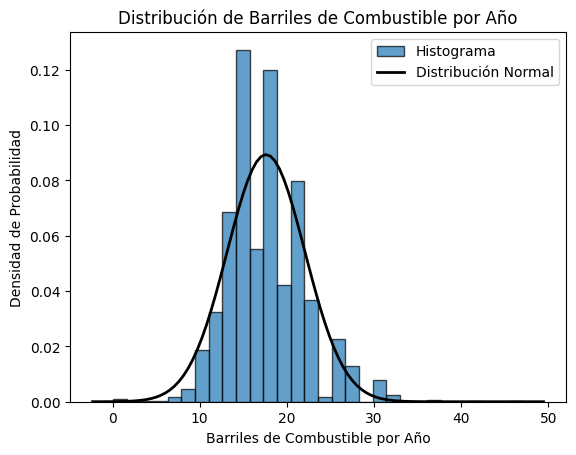

In [58]:
plt.hist(vehiculos['Fuel Barrels/Year'], bins=30, edgecolor='black', density=True, alpha=0.7, label='Histograma')

mu, std = np.mean(vehiculos['Fuel Barrels/Year']), np.std(vehiculos['Fuel Barrels/Year'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal')

plt.title('Distribución de Barriles de Combustible por Año')
plt.xlabel('Barriles de Combustible por Año')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

plt.show()

In [42]:
from scipy.stats import shapiro

data = vehiculos['Fuel Barrels/Year']
stat, p = shapiro(data)

print(f"Estadístico de prueba: {stat:.4f}")
print(f"Valor p: {p:.4f}")

# Interpretar los resultados
alpha = 0.05
if p > alpha:
    print("Distribución normal.")
else:
    print("No distribución normal.")


Estadístico de prueba: 0.9675
Valor p: 0.0000
No distribución normal.


2. Emisiones de CO2 Gramos/Milla 

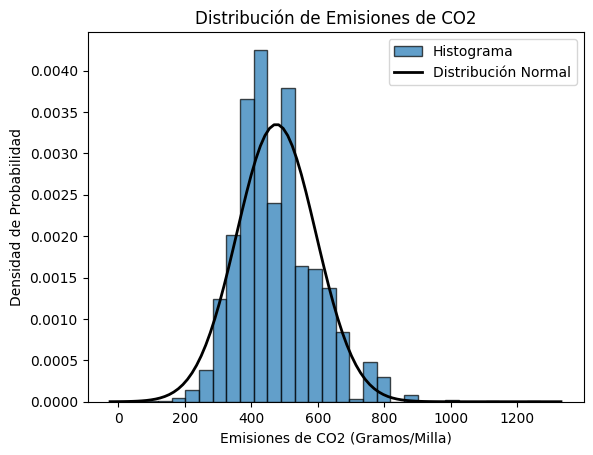

In [57]:
plt.hist(vehiculos['CO2 Emission Grams/Mile'], bins=30, edgecolor='black', density=True, alpha=0.7, label='Histograma')


mu, std = np.mean(vehiculos['CO2 Emission Grams/Mile']), np.std(vehiculos['CO2 Emission Grams/Mile'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)


plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal')


plt.title('Distribución de Emisiones de CO2')
plt.xlabel('Emisiones de CO2 (Gramos/Milla)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

plt.show()

In [43]:
data = vehiculos['CO2 Emission Grams/Mile']
stat, p = shapiro(data)

print(f"Estadístico de prueba: {stat:.4f}")
print(f"Valor p: {p:.4f}")

# Interpretar los resultados
alpha = 0.05
if p > alpha:
    print("Distribución normal.")
else:
    print("No distribución normal.")

Estadístico de prueba: 0.9676
Valor p: 0.0000
No distribución normal.


3. MPG combinado

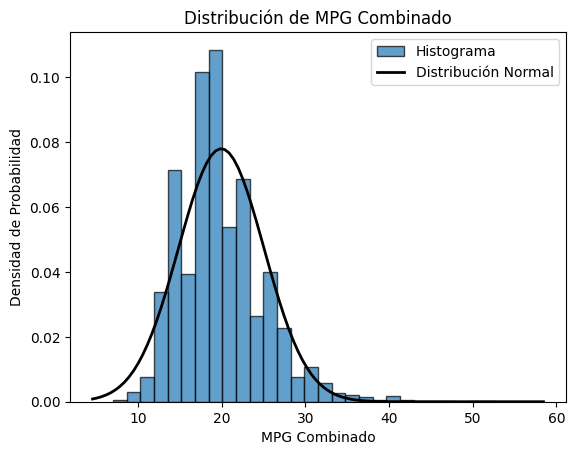

In [56]:
plt.hist(vehiculos['Combined MPG'], bins=30, edgecolor='black', density=True, alpha=0.7, label='Histograma')


mu, std = np.mean(vehiculos['Combined MPG']), np.std(vehiculos['Combined MPG'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)


plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal')

plt.title('Distribución de MPG Combinado')
plt.xlabel('MPG Combinado')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

plt.show()

In [44]:
data = vehiculos['Combined MPG']
stat, p = shapiro(data)

print(f"Estadístico de prueba: {stat:.4f}")
print(f"Valor p: {p:.4f}")

# Interpretar los resultados
alpha = 0.05
if p > alpha:
    print("Distribución normal.")
else:
    print("No distribución normal.")

Estadístico de prueba: 0.9466
Valor p: 0.0000
No distribución normal.


In [54]:
#prueba de saphiro-test

import numpy as np
from scipy.stats import shapiro

# Generar una muestra aleatoria con n=10000 y random_state=123
np.random.seed(123)  # Establecer la semilla para reproducibilidad
data = np.random.normal(loc=0, scale=1, size=10000)  # Generar datos normalmente distribuidos

# Realizar el test de Shapiro-Wilk
stat, p = shapiro(data)

print(f"Estadístico de prueba: {stat:.4f}")
print(f"Valor p: {p:.4f}")

# Interpretar los resultados
alpha = 0.05
if p > alpha:
    print("Distribución normal.")
else:
    print("No distribución normal.")


Estadístico de prueba: 0.9999
Valor p: 0.8251
Distribución normal.


/home/somberkers/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


¿Cuál o cuáles de las variables tienen una distribución casi normal? ¿Cómo lo sabes?

In [ ]:
Ninguna realmente, no son simetricas

In [ ]:
Hay pruebas estadisticas con el p-value y demas que lo podrian verificar también, pero en este caso a simple vista ya se ve

In [ ]:
Tambien el saphiro-test, pero la prueba no me parece conluyente porque coge una muestra random que puede no ser representativa

Ninguno de ellos está normalmente ditribuido. 

## Distribución Exponencial

1. Utilizando `numpy.random.exponential`, crea una función que devuelva una lista de números distribuidos exponencialmente con la media de 10. 

1. Utiliza la función para generar dos secuencias de números de tamaño 10 y 100.

1. 2. Traza las distribuciones como histogramas con el número de bins como 100.

El resultado debe ser como el siguiente:

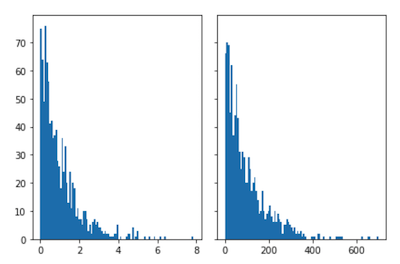

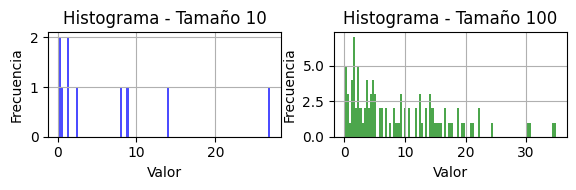

In [26]:
def generar_exponencial(media, size):
    return np.random.exponential(scale=media, size=size)


secuencia_10 = generar_exponencial(media=10, size=10)
secuencia_100 = generar_exponencial(media=10, size=100)


plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
plt.hist(secuencia_10, bins=100, color='blue', alpha=0.7)
plt.title('Histograma - Tamaño 10')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(secuencia_100, bins=100, color='green', alpha=0.7)
plt.title('Histograma - Tamaño 100')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.tight_layout()
plt.show()

¿En qué se diferencian ambas distribuciones?

La media cambia, por lo que la distribución también cambia. 

## Distribución Exponencial de datos reales

Supongamos que el tiempo que uno pasa en un banco se distribuye exponencialmente con media de 10 minutos (es decir, λ = 1/10). ¿Cuál es la probabilidad de que un cliente pase menos de quince minutos en el banco? 

Escribe un código en python para resolver este problema

In [33]:
from scipy.stats import expon

# Parámetro lambda para la distribución exponencial (media de 10 minutos)
λ = 1/10

# Tiempo máximo de 15 minutos en el banco
x = 15

# Calcular la probabilidad usando la CDF de la distribución exponencial
prob_menos15 = expon.cdf(x, scale=1/λ)

print(prob_menos15)


0.7768698398515702


¿Cuál es la probabilidad de que el cliente pase más de 15 minutos?

In [34]:
prob_mas15= 1-prob_menos15
print(prob_mas15)

0.2231301601484298
